In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [130]:
# import libraries: 

# To display plots directly in the notebook:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import sklearn
import seaborn as sns
import zipfile



In [131]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

In [132]:
zf_train = zipfile.ZipFile('../input/nyc-taxi-trip-duration/train.zip')
nyc_train_data = pd.read_csv(zf_train.open('train.csv'))

zf_test = zipfile.ZipFile('../input/nyc-taxi-trip-duration/test.zip')
nyc_test_data = pd.read_csv(zf_test.open('test.csv'))

In [133]:
nyc_train_data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [134]:
train_length = len(nyc_train_data)


1458644

In [135]:
nyc_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [136]:
nyc_train_data.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [137]:
#as the datatype of the datetimes is Object, we convert it into datetime-datatype: 

nyc_train_data['pickup_datetime'] = pd.to_datetime(nyc_train_data['pickup_datetime'])
nyc_train_data['dropoff_datetime'] = pd.to_datetime(nyc_train_data['dropoff_datetime'])
# nyc_train_data.info() # to make sure we changed the datatype

<AxesSubplot:xlabel='pickup_hour', ylabel='count'>

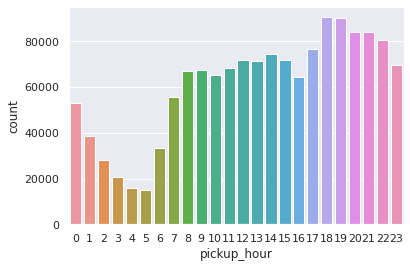

In [138]:
# after that create some plots/tables that display durations in correlation with different date and time types:

#copy data for charts:
nyc_2 = nyc_train_data.copy(deep=True)


# display amount of trips correlated to the daytime:
nyc_2['pickup_hour'] = nyc_2['pickup_datetime'].dt.hour

sns.set_theme(style='darkgrid', palette = 'colorblind')
sns.countplot(x = nyc_2['pickup_hour'])

<AxesSubplot:xlabel='weekdays', ylabel='count'>

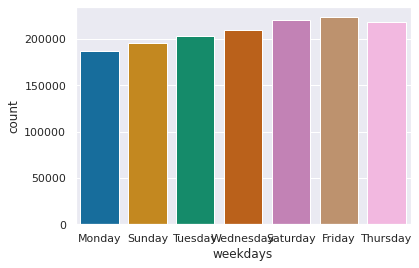

In [139]:
# display amount of trips correlated to the weekdays:

nyc_2['weekdays'] = nyc_2['pickup_datetime'].dt.strftime('%A')

sns.set_theme(style='darkgrid', palette = 'colorblind')
sns.countplot(x = nyc_2['weekdays'])
# komische Ordnung 



In [166]:
# see relationship between vendor_id and trip_duration: 
# vendor_id is either 1 or 2

x = nyc_train_data['vendor_id']
y = nyc_train_data['trip_duration']
#plt.scatter(x, y, s=1, c='red')

#plt.yticks(np.arange(3.5,10.5, 0.5))
#plt.plot(x,y,'ro')
#plt.axis([0,5,0,20])
#plt.show()


#sns.set_theme(style='darkgrid', palette = 'colorblind')
#sns.countplot(x = x, y = y)



ValueError: Cannot pass values for both `x` and `y`

In [141]:
# see relationship between trip_duration and passenger_count: 


In [142]:
# find correlations and relationships between the features: 

corr_matrix = nyc_train_data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,0.005125,0.000343,0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,0.005125,0.022568,1.000000,0.114884,0.494038,0.029204
dropoff_longitude,0.001528,0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,0.002762,0.100190,0.494038,0.124873,1.000000,0.020677
trip_duration,0.020304,0.008471,0.026542,0.029204,0.014678,0.020677,1.000000


possible correlations to have a look on: 
* vendor_id and passenger_count --> corr = 0.28
* pickup_longitude and dropoff_longitude --> corr = 0.78 (vllt logisch?)
* pickup_latitude and dropoff_latitude --> corr = 0.49 (vllt logisch? )

